In [9]:
import csv
import time
from pylsl import StreamInlet, resolve_byprop
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# CSVファイルにデータを保存する関数
def save_data_to_csv(start_time, timestamp, data, filename):
    fieldnames = ['timestamp', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    with open(filename, 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # ヘッダーがない場合は、ヘッダーを書き込む
        csvfile.seek(0, 2)
        if csvfile.tell() == 0:
            writer.writeheader()

        # Start time subtraction for relative timestamps
        relative_timestamp = lsl_to_local_datetime(timestamp) - start_time
        row = {'timestamp': relative_timestamp.total_seconds()}
        row.update({fieldnames[i + 1]: data[i+3] for i in range(len(data)-5)})
        writer.writerow(row)

#CSVファイルからデータを読み込む関数
def load_data_from_csv(filename):
    data = []
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(row)

    return data

# データをプロットする関数
def plot_data(data, channels):
    timestamps = [float(row['timestamp']) for row in data]

    plt.figure(figsize=(15, 8))

    for channel in channels:
        values = [float(row[channel]) for row in data]
        plt.plot(timestamps, values, label=channel)

    plt.xlabel('Timestamp (s)')
    plt.ylabel('Sensor Value')
    plt.title('Brainwave Data')
    plt.legend()
    plt.show()

def lsl_to_local_datetime(lsl_timestamp):
    return datetime.fromtimestamp(lsl_timestamp)

Connected to Emotiv EPOCX stream.
done.


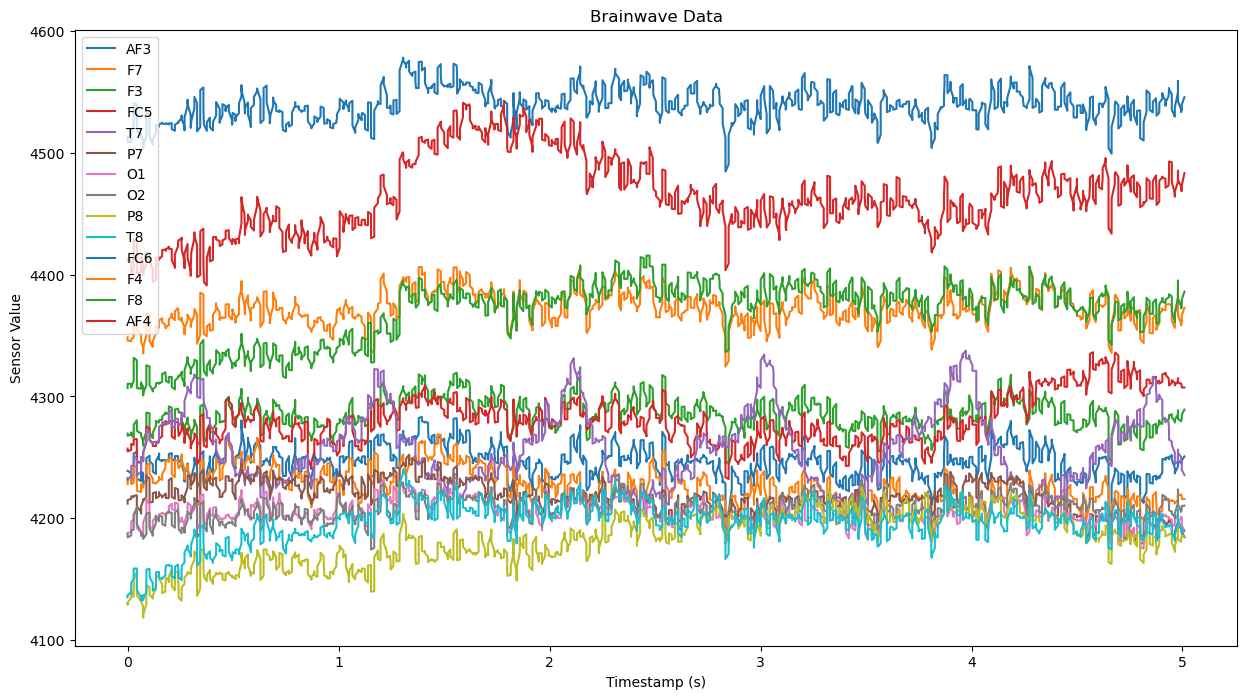

In [35]:
# EPOCXのストリームを探す
streams = resolve_byprop('type', 'EEG', timeout=5)

if not streams:
    raise RuntimeError("No EEG stream found. Make sure the EmotivPro LSL Connector is running.")

# ストリームを開く
inlet = StreamInlet(streams[0])

print("Connected to Emotiv EPOCX stream.")

# CSVファイル名を指定
filename = 'OpenEyes.csv'

# ファイルを上書きモードで開いてすぐ閉じることで、中身を空にする
with open(filename, 'w') as f:
    pass

# データを取得し、CSVファイルに記録する
duration = 5  # 収集するデータの期間（秒）
start_time = None

while True:
    sample, timestamp = inlet.pull_sample()
    if start_time is None:
        start_time = lsl_to_local_datetime(timestamp)
    save_data_to_csv(start_time, timestamp, sample, filename)
    if (lsl_to_local_datetime(timestamp) - start_time).total_seconds() >= duration:
        break

print("done.")

# plot実行
if __name__ == "__main__":
    filename = 'OpenEyes.csv'
    data = load_data_from_csv(filename)

    # 選択したチャンネルをプロット
    channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    plot_data(data, channels)

Connected to Emotiv EPOCX stream.
done.


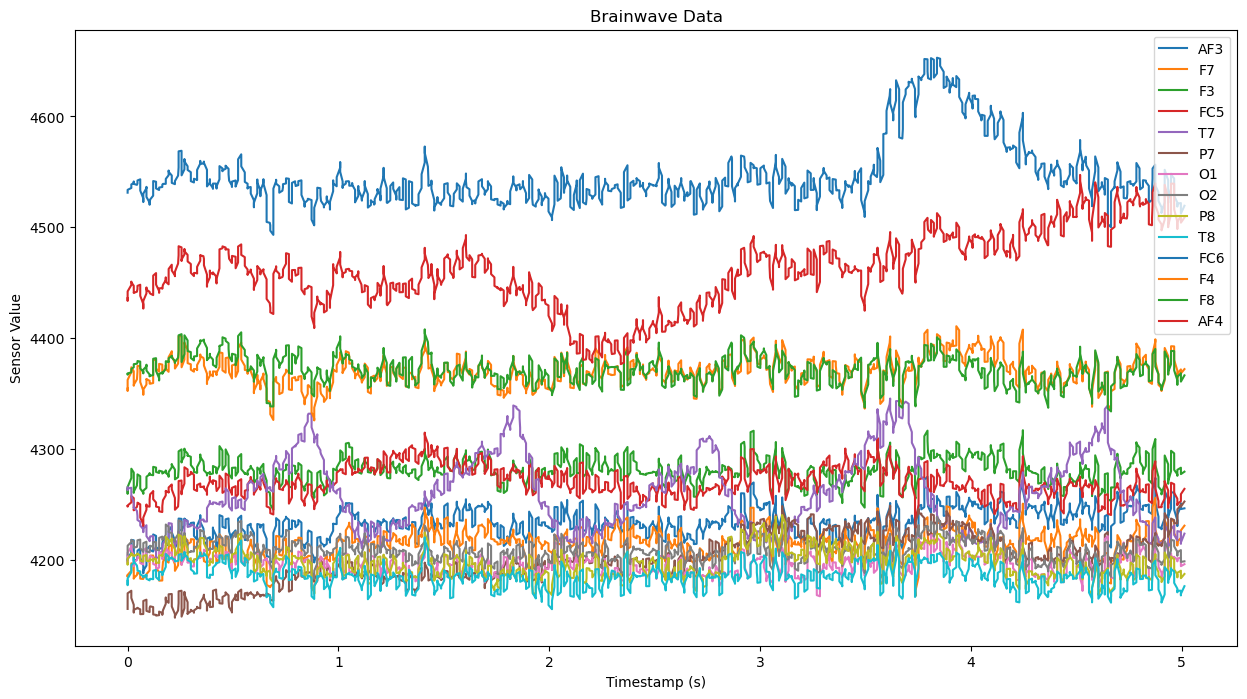

In [37]:
# EPOCXのストリームを探す
streams = resolve_byprop('type', 'EEG', timeout=5)

if not streams:
    raise RuntimeError("No EEG stream found. Make sure the EmotivPro LSL Connector is running.")

# ストリームを開く
inlet = StreamInlet(streams[0])

print("Connected to Emotiv EPOCX stream.")

# CSVファイル名を指定
filename = 'CloseEyes.csv'

# ファイルを上書きモードで開いてすぐ閉じることで、中身を空にする
with open(filename, 'w') as f:
    pass

# データを取得し、CSVファイルに記録する
duration = 5  # 収集するデータの期間（秒）
start_time = None

while True:
    sample, timestamp = inlet.pull_sample()
    if start_time is None:
        start_time = lsl_to_local_datetime(timestamp)
    save_data_to_csv(start_time, timestamp, sample, filename)
    if (lsl_to_local_datetime(timestamp) - start_time).total_seconds() >= duration:
        break

print("done.")

# plot実行
if __name__ == "__main__":
    filename = 'CloseEyes.csv'
    data = load_data_from_csv(filename)

    # 選択したチャンネルをプロット
    channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    plot_data(data, channels)